In [232]:
import csv
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import random

In [233]:
DataTrain = pd.read_csv('salju_train.csv')
DataTrain

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


In [234]:
DataTest = pd.read_csv('salju_test.csv')
DataTest

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


In [235]:
df = pd.DataFrame(DataTrain)
#drop data yang tidak dibutuhkan
df = df.drop('BersaljuBesok', axis=1)
df = df.drop('BersaljuHariIni', axis=1)
df

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

# Preprocessing

Check Empty

In [237]:
#Mencari nilai kosong
datakosong = df.isnull()
for column in datakosong.columns.values.tolist():
  print(column)
  print(datakosong[column].value_counts())
  print("")

id
False    109095
Name: id, dtype: int64

Tanggal
False    109095
Name: Tanggal, dtype: int64

KodeLokasi
False    109095
Name: KodeLokasi, dtype: int64

SuhuMin
False    107973
True       1122
Name: SuhuMin, dtype: int64

SuhuMax
False    108166
True        929
Name: SuhuMax, dtype: int64

Hujan
False    106664
True       2431
Name: Hujan, dtype: int64

Penguapan
False    62071
True     47024
Name: Penguapan, dtype: int64

SinarMatahari
False    56716
True     52379
Name: SinarMatahari, dtype: int64

ArahAnginTerkencang
False    101351
True       7744
Name: ArahAnginTerkencang, dtype: int64

KecepatanAnginTerkencang
False    101399
True       7696
Name: KecepatanAnginTerkencang, dtype: int64

ArahAngin9am
False    101172
True       7923
Name: ArahAngin9am, dtype: int64

ArahAngin3pm
False    105898
True       3197
Name: ArahAngin3pm, dtype: int64

KecepatanAngin9am
False    107742
True       1353
Name: KecepatanAngin9am, dtype: int64

KecepatanAngin3pm
False    106792
True       2303

In [238]:
df.isna().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
dtype: int64

Handling Empty Data

In [239]:
#checking modus on categorical type 
print('Arah Angin Terkencang', "\n", df['ArahAnginTerkencang'].mode())
print('ArahAngin9am', "\n",df['ArahAngin9am'].mode())
print('ArahAngin3pm', "\n",df['ArahAngin3pm'].mode())

Arah Angin Terkencang 
 0    W
dtype: object
ArahAngin9am 
 0    N
dtype: object
ArahAngin3pm 
 0    SE
dtype: object


In [240]:
#Mengisi dengan mean
df['SuhuMin'].fillna(df['SuhuMin'].mean(), inplace=True)
df['SuhuMax'].fillna(df['SuhuMax'].mean(), inplace=True)
df['Hujan'].fillna(df['Hujan'].mean(), inplace=True)
df['Penguapan'].fillna(df['Penguapan'].mean(), inplace=True)
df['SinarMatahari'].fillna(df['SinarMatahari'].mean(), inplace=True)
df['KecepatanAnginTerkencang'].fillna(df['KecepatanAnginTerkencang'].mean(), inplace=True)
df['KecepatanAngin9am'].fillna(df['KecepatanAngin9am'].mean(), inplace=True)
df['KecepatanAngin3pm'].fillna(df['KecepatanAngin3pm'].mean(), inplace=True)
df['Kelembaban9am'].fillna(df['Kelembaban9am'].mean(), inplace=True)
df['Kelembaban3pm'].fillna(df['Kelembaban3pm'].mean(), inplace=True)
df['Tekanan9am'].fillna(df['Tekanan9am'].mean(), inplace=True)
df['Tekanan3pm'].fillna(df['Tekanan3pm'].mean(), inplace=True)
df['Awan9am'].fillna(df['Awan9am'].mean(), inplace=True)
df['Awan3pm'].fillna(df['Awan3pm'].mean(), inplace=True)
df['Suhu9am'].fillna(df['Suhu9am'].mean(), inplace=True)
df['Suhu3pm'].fillna(df['Suhu3pm'].mean(), inplace=True)


df.isnull().sum()

id                             0
Tanggal                        0
KodeLokasi                     0
SuhuMin                        0
SuhuMax                        0
Hujan                          0
Penguapan                      0
SinarMatahari                  0
ArahAnginTerkencang         7744
KecepatanAnginTerkencang       0
ArahAngin9am                7923
ArahAngin3pm                3197
KecepatanAngin9am              0
KecepatanAngin3pm              0
Kelembaban9am                  0
Kelembaban3pm                  0
Tekanan9am                     0
Tekanan3pm                     0
Awan9am                        0
Awan3pm                        0
Suhu9am                        0
Suhu3pm                        0
dtype: int64

In [241]:
print(df['ArahAnginTerkencang'].value_counts())
print(df['ArahAngin3pm'].value_counts())
print(df['ArahAngin9am'].value_counts())

W      7491
SE     7078
N      6955
S      6931
E      6902
SSE    6882
WSW    6824
SW     6656
SSW    6495
WNW    6202
ENE    6125
NW     6087
ESE    5429
NE     5342
NNW    5025
NNE    4927
Name: ArahAnginTerkencang, dtype: int64
SE     8204
W      7631
S      7479
WSW    7076
SSE    7015
SW     7002
WNW    6682
N      6678
NW     6456
E      6345
ESE    6333
NE     6222
SSW    6057
NNW    5905
ENE    5883
NNE    4930
Name: ArahAngin3pm, dtype: int64
N      8820
SE     6986
E      6877
SSE    6829
NW     6625
S      6423
W      6339
SW     6306
NNE    6142
NNW    6018
ENE    5890
NE     5713
SSW    5689
ESE    5676
WNW    5572
WSW    5267
Name: ArahAngin9am, dtype: int64


In [242]:
#mengisi missing value
df['ArahAnginTerkencang'].fillna('W', inplace=True)
df['ArahAngin9am'].fillna('N', inplace=True)
df['ArahAngin3pm'].fillna('SE', inplace=True)

correlation

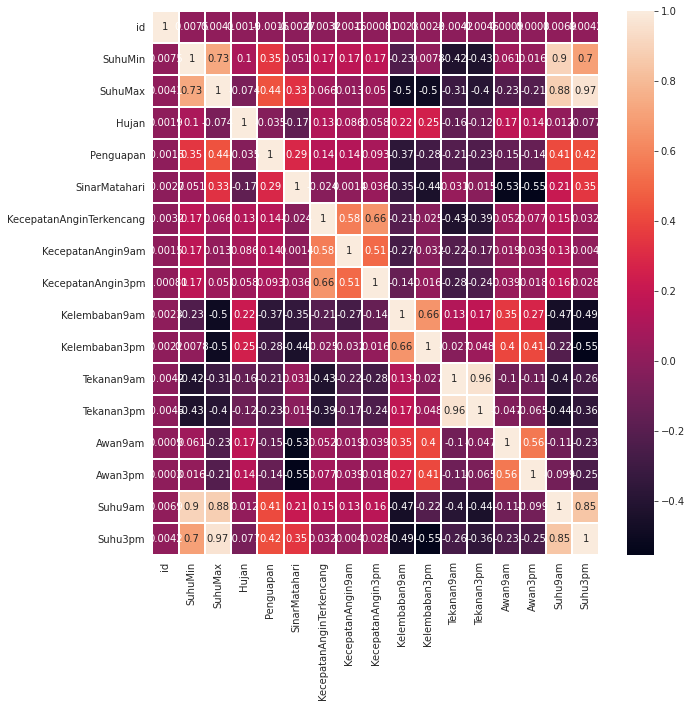

In [243]:
df_corr = df.corr

sns.set({'figure.figsize':(10,10)})
sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=1)

Outlier check

In [244]:
dtrain = df.loc[:,['Suhu3pm','SuhuMax']]
dtrain

,Suhu3pm,SuhuMax
0,15.0,15.5
1,15.5,17.0
2,29.6,32.0
3,23.2,24.5
4,18.1,20.3
...,...,...
109090,22.1,23.7
109091,24.4,25.2
109092,19.8,20.4
109093,29.2,29.8


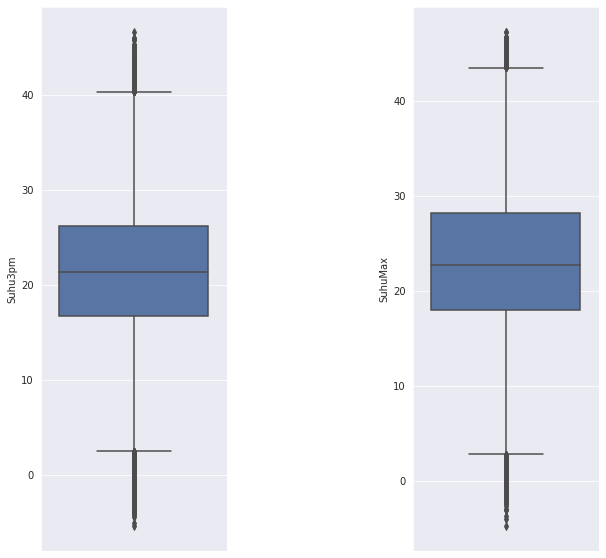

In [245]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=dtrain['Suhu3pm'], ax=axes[0])
sns.boxplot(y=dtrain['SuhuMax'], ax=axes[1])
plt.subplots_adjust(wspace=1)

Handling outlier

In [246]:
while True:
  #mencari jarak batas atas & batas bawah
  q1_smax, q3_smax = dtrain['SuhuMax'].quantile(0.25), dtrain['SuhuMax'].quantile(0.75)
  q1_s3pm, q3_s3pm = dtrain['Suhu3pm'].quantile(0.25), dtrain['Suhu3pm'].quantile(0.75)
  #mencari batas outlier
  qr_smax = q3_smax - q1_smax
  qr_s3pm = q3_s3pm - q1_s3pm
  lower_smax = q1_smax - (1.5*qr_smax)
  higher_smax = q3_smax + (1.5*qr_smax)
  lower_s3pm = q1_s3pm - (1.5*qr_s3pm)
  Higher_s3pm = q3_s3pm + (1.5*qr_s3pm)
  #identifikasi outlier
  out = dtrain[(dtrain['SuhuMax'] > higher_smax)|(dtrain['SuhuMax'] < lower_smax)|(dtrain['Suhu3pm'] > Higher_s3pm)|(dtrain['Suhu3pm'] < lower_s3pm)]
  idk = out.index
  dtrain.drop(idk, inplace = True)
  if (out.shape[0] <= 0):
    break


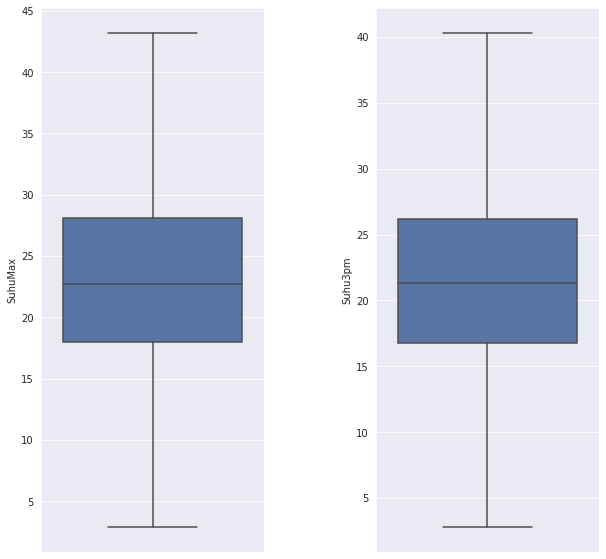

In [247]:
f,axes = plt.subplots(1,2)
sns.boxplot(y = dtrain['SuhuMax'], ax=axes[0])
sns.boxplot(y = dtrain['Suhu3pm'], ax=axes[1])
plt.subplots_adjust(wspace=0.5)
plt.show()

MinMaxScaler

In [256]:
n = MinMaxScaler()
data = n.fit_transform(dtrain.astype(float))
data

array([[0.32533333, 0.31265509],
       [0.33866667, 0.34987593],
       [0.71466667, 0.72208437],
       ...,
       [0.45333333, 0.43424318],
       [0.704     , 0.6674938 ],
       [0.54666667, 0.60794045]])

# Clustering

Centroids

In [249]:
def centroids(suhu,k):
  random.seed(9)
  centro = {
      i + 1 : [random.choices(suhu['SuhuMax']),random.choices(suhu['Suhu3pm'])] #random data
      for i in range(k)
      }
  return centro

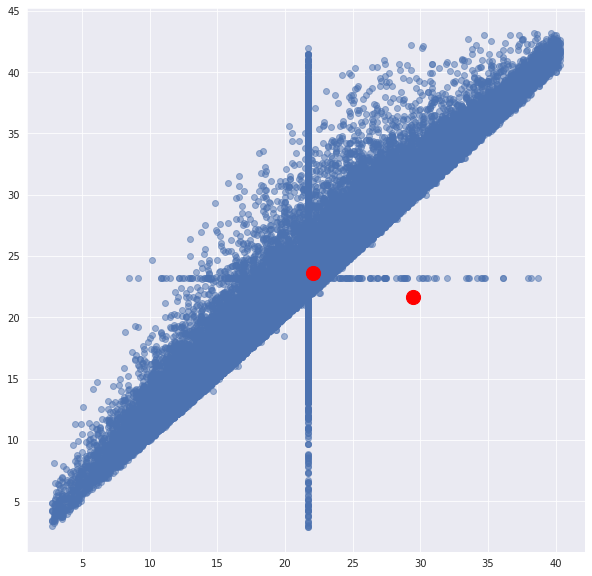

In [250]:
plt.scatter(dtrain['Suhu3pm'], dtrain['SuhuMax'], alpha=0.5)
for i in centro:
  plt.scatter(*centro[i], color='red', s=200)
plt.show()

In [251]:
def jarak(data2,centro): #euclidian
  for i in centro.keys():
    data2['Centroid_{}'.format(i)] = (
        np.sqrt(
            (data2['SuhuMax'] - centro[i][0]) ** 2 + (data2['Suhu3pm'] - centroids[i][1]) ** 2)
    )
  return data2

In [257]:
def allocations(data2,centro):
  allo_centro = ['Centroid_{}'.format(i) for i in centro.keys()]
  data2['suhu'] = data2.loc[:, centroids_distance_cols].idxmin(axis=1)
  data2['suhu'] = data2['suhu'].map(lambda x: int(x.lstrip('centroid_')))
  data2['color'] = data2['suhu'].map(lambda x: colmap[x])
  return data2

In [253]:
def titikbaru(centro,data2):
  for i in centro.keys():
    centro[i][0] = np.mean(data2[data2['suhu'] == i]['SuhuMax'])
    centro[i][1] = np.mean(data2[data2['suhu'] == i]['Suhu3pm'])
  return centro

K-Means

In [ ]:
#def kmeans(x,k,i):
#    idx = np.random.choice(len(x), k, replace=False)
    #pilih centroid secara random 
#    centroids = x[idx, :] 
     
    #mencari jarak antara tiap centroid dan semua data point
#    jarak = cdist(x, centroids ,'euclidean') 
     
    #centroid dengan jarak minimum
#    points = np.array([np.argmin(i) for i in jarak]) 
     
    #mengulangi cara diatas sebanyak iterasi yang diinput
#    for _ in range(i): 
#        centroids = []
#        for idx in range(k):
            #melakukan update centroid dengan mengambil rata rata cluster
#            temp_cent = x[points==idx].mean(axis=0) 
#            centroids.append(temp_cent)
 
#        centroids = np.vstack(centroids) #Update centroid 
         
#        jarak = cdist(x, centroids ,'euclidean')
#        points = np.array([np.argmin(i) for i in jarak])

         
#    return points, centroids, jarak

In [254]:
def kmeans(i):
  centro = jarak(dtrain,i)
  data2 = copy.deepcopy(data2)
  data2 = jarak(data2,centro)
  data2 = titikbaru(centro,data2)
  centro = newcentro(centro,data2)
  while True :
    oldcentro = copy.deepcopy(centro)
    data2 = jarak(data2,centro)
    data2 = alokasi(data2,centro)
    centro = newcentro(centro,data2)
    if oldcentro == centro:
      break
  return data2,centro

In [259]:
data2, centro = kmeans(2)

AttributeError: ignored

In [ ]:
plt.scatter(data2['Suhu3pm'], data2['SuhuMax'], alpha=0.5)
for i in centro:
  plt.scatter(*centroids[i], color='red', s=200)
plt.show()

# EVALUASI

In [ ]:
#distortions = []
#mapping = {}
#K = range(1,10)
#for k in K :
#  kmeanModel = kmeans(k=k)
#  kmeanModel.fit(data2.values)

#  distortions.append(sum(np.min(cdist(data2.values, [i[1].tolist() for i in kmeanModel.centroids.items()], 'euclidean'), axis=1))/data2.shape[0])

# Elbow Method

In [ ]:
#plt.plot(range(1, 11), , '-bx')
#plt.title('Elbow Method')
#plt.xlabel('Number of Clusters')
#plt.ylabel('WCSS')
#plt.show(